In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import os
pwd = os.getcwd()

In [135]:
df = pd.read_csv(os.path.basename(pwd +'/data.csv'))
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [136]:
#Dropping the redundant features
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

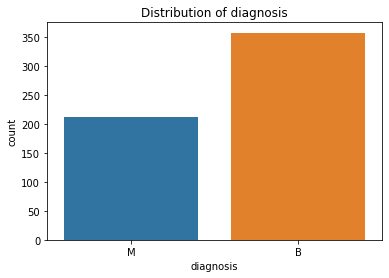

In [138]:
plt.title('Distribution of diagnosis')
sns.countplot(x='diagnosis',data=df)

In [139]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [140]:
#Checking every column for missing values

df.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

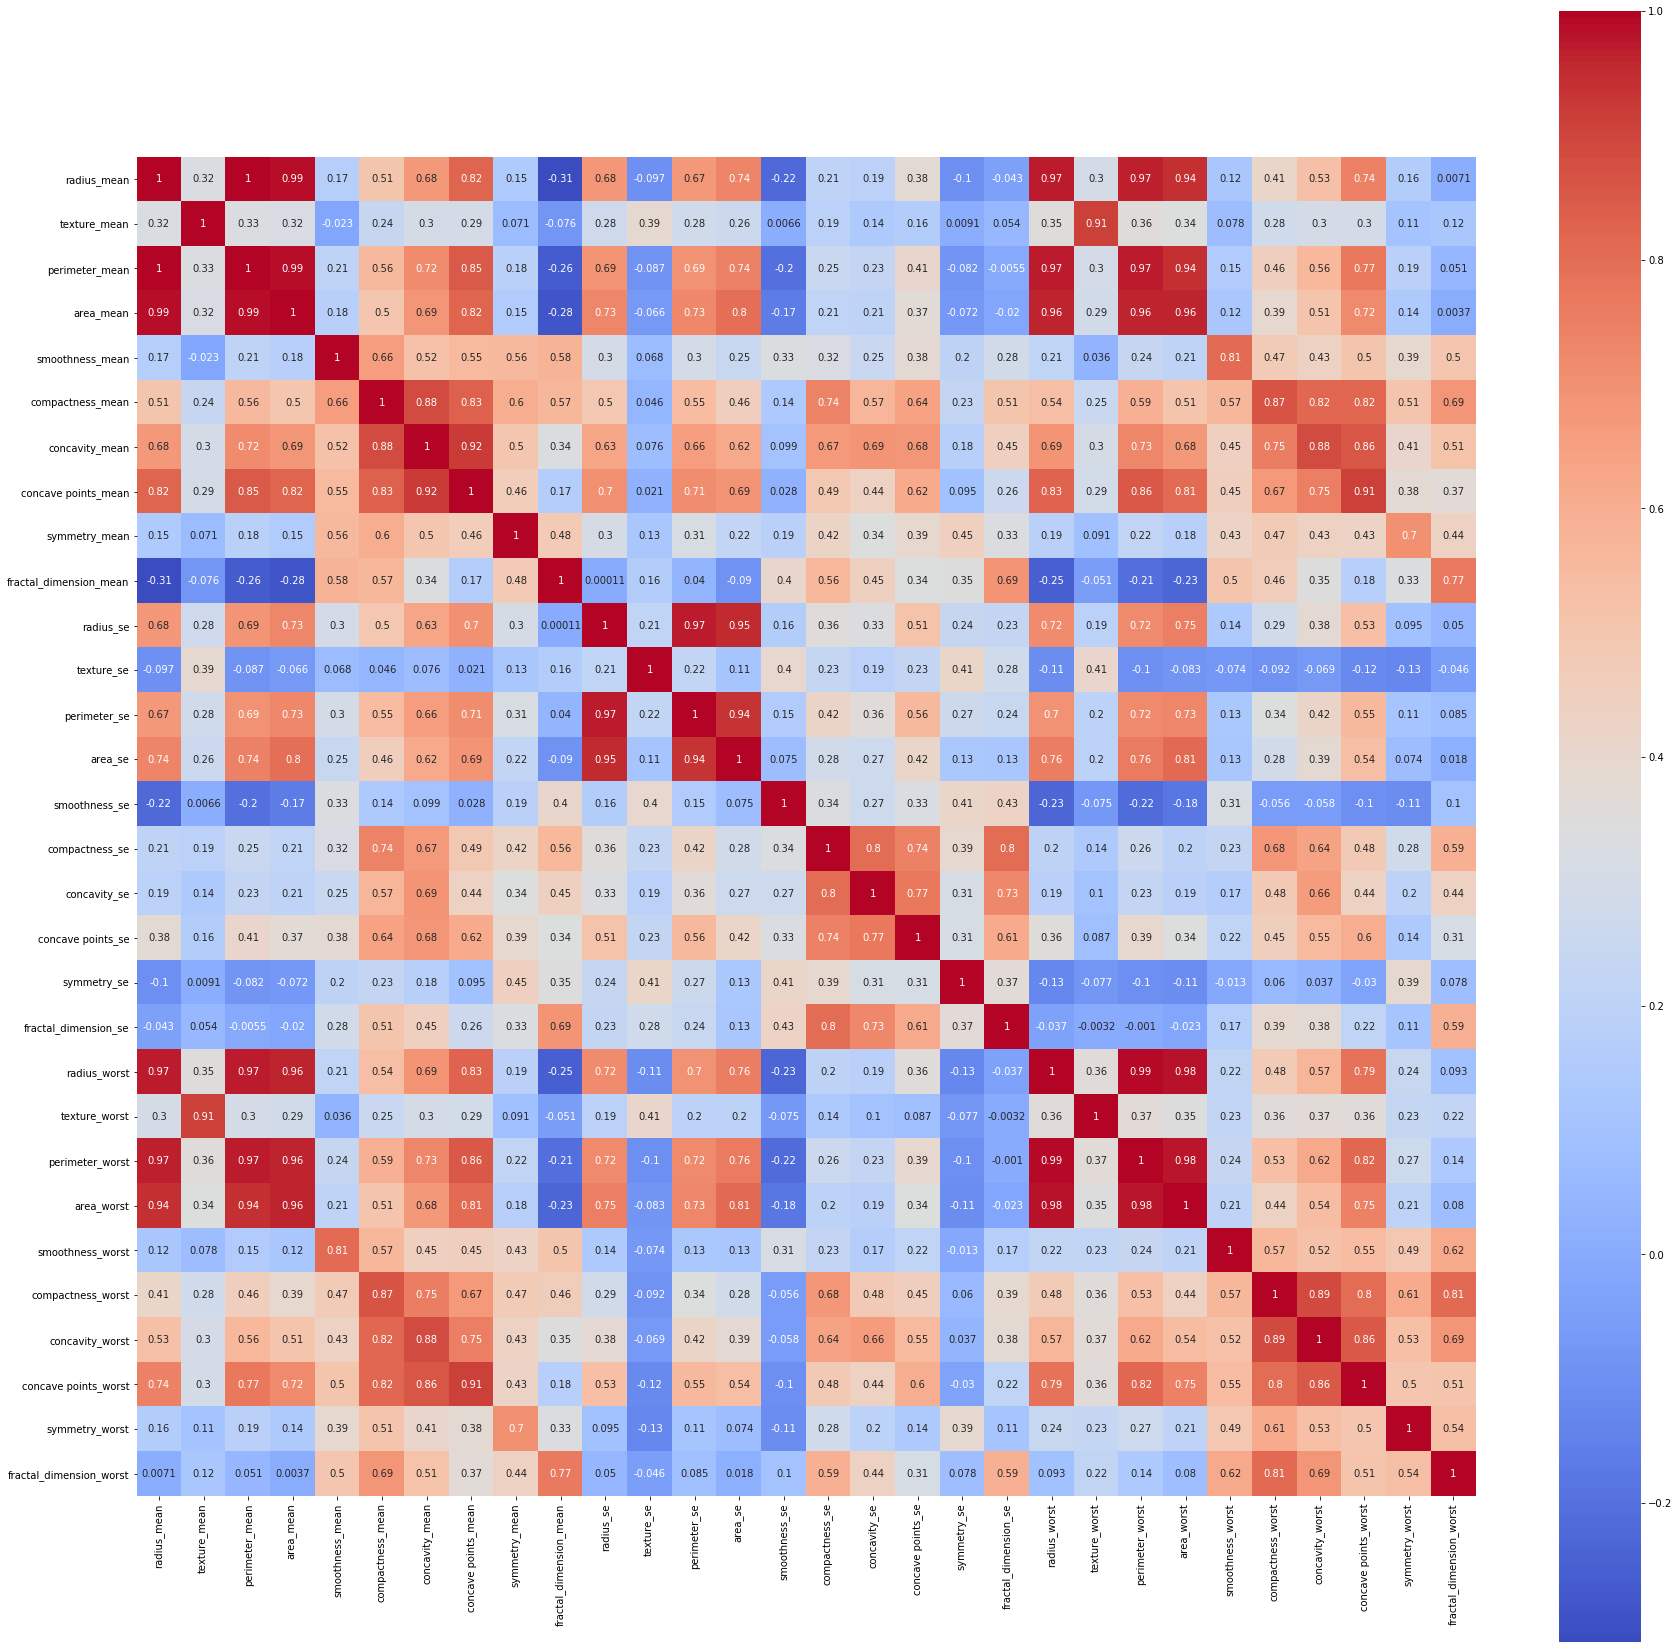

In [142]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [143]:
pcorr= df.corr(method='pearson').abs()

In [144]:
# Select upper triangle of correlation matrix
upper = pcorr.where(np.triu(np.ones(pcorr.shape), k=1).astype(np.bool))
upper
# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]
to_drop

['perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'concavity_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'fractal_dimension_worst']

In [147]:
df = df.drop(df[to_drop], axis=1)
features_mean = list(df.columns[1:24])

In [148]:
diag_map = {'M':1, 'B':0}
df['diagnosis'] = df['diagnosis'].map(diag_map)

#### Splitting the data into training and test sets

In [149]:
X = df.loc[:,features_mean]
y = df.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Building the knn classifier

In [150]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [151]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [152]:
knn_classifier.score(X_test, y_test)

0.8713450292397661

#### Scaling

In [153]:
#Setting up the scaling pipeline 

pipeline_order = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 3))]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 

knn_classifier_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

knn_classifier_scaled.score(X_test, y_test)

0.9181286549707602

### Predicting categories with Logistic Regression

In [177]:
#Initializing an logistic regression object

logistic_regression = linear_model.LogisticRegression()

#Fitting the model to the training and test sets

logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [178]:
logistic_regression.score(X_test, y_test)

0.9239766081871345

### Naive Bayes

In [154]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#Initializing an NB classifier

nb_classifier = GaussianNB()

In [155]:
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [156]:
prediction = nb_classifier.predict(X_test)

In [157]:
print("Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))

Classifier Accuracy: 87.72%


### Linear Support Vector Machines

In [201]:
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state = 42)

In [202]:
#Fitting the model to the training data
svm.fit(X_train, y_train)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(random_state=42)

In [203]:
svm.score(X_test, y_test)

0.9415204678362573

In [205]:
#Setting up the scaling pipeline 

order = [('scaler', StandardScaler()), ('SVM', LinearSVC(C = 0.1, random_state = 50))]
pipeline = Pipeline(order)
svm_scaled = pipeline.fit(X_train, y_train)
svm_scaled.score(X_test, y_test)

0.9590643274853801

#### Stochastic Gradient Descen

In [206]:
from sklearn.linear_model import SGDClassifier
sdg_classifier = SGDClassifier()

In [207]:
sdg_classifier.fit(X_train, y_train)

SGDClassifier()

In [208]:
sdg_classifier.score(X_test, y_test)

0.8304093567251462